# Midterm Project: Classification Analysis
**Author:** Derek Fintel

**Contact:** 555-555-5555; arealemail@email.com

**Date:** April, 6th, 2025 

**Objective:** For this project, we're going to load a viable dataset with various features on passengers of the Titanic. We're going to conduct feature engineering and then train & evaluate a classification model to predict the survivability of passengers. We'll also take a look at how various models may measure and serve in our analysis. 

**Data Source:** https://www.kaggle.com/c/titanic/data


## Introduction
In this project we utilize a trusted Titanic dataset to conduct various analyses, exercise functions, and provide meaningful predicitions of target data. 

This project is organized into the following Sections:
- Section 1: Import and Inspect the Data
- Section 2: Section 2. Data Exploration and Preparation
- Section 3. Feature Selection and Justification
- Section 4: Train a Model (Classification)
- Section 5: Improve the Model or Try Alternates 
- Section 6: Final Thoughts & Insights

## Imports  
Below are our modules used.

In [22]:
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet, Lasso
from sklearn.metrics import root_mean_squared_error, mean_squared_error, mean_absolute_error, r2_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

## Section 1. Load and Inspect the Data

### 1.1 Load the dataset and display its info
- We load the Titanic dataset from our kaggle source: https://www.kaggle.com/c/titanic/data.
- We display summary information of the dataset using the info() method.
- The source file is loaded as a CSV in our notebook and available in the 'data' folder.

In [23]:
# Retrieve the training test data from csv.
df = pd.read_csv('data/titanic_train.csv')
df.columns = df.columns.str.strip().str.lower()
print(df.columns)

# Retrieve summary info via '.info()'
df.info()

Index(['passengerid', 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'cabin', 'embarked'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerid  891 non-null    int64  
 1   survived     891 non-null    int64  
 2   pclass       891 non-null    int64  
 3   name         891 non-null    object 
 4   sex          891 non-null    object 
 5   age          714 non-null    float64
 6   sibsp        891 non-null    int64  
 7   parch        891 non-null    int64  
 8   ticket       891 non-null    object 
 9   fare         891 non-null    float64
 10  cabin        204 non-null    object 
 11  embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### 1.2 Display the first 10 rows.  

In [24]:
# Here we 'print' the first 10 rows via '.head(10)'
print(df.head(10))

   passengerid  survived  pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                name     sex   age  sibsp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            McCarthy, Mr. Timothy J    male  54

### 1.3 Check for missing values using the 'isnull()' method and then the 'sum()' method.

In [25]:
# Here we use '.isnull()' to retrieve missing values
# We follow by retrieving summary count via 'sum()'
df.isnull().sum()

passengerid      0
survived         0
pclass           0
name             0
sex              0
age            177
sibsp            0
parch            0
ticket           0
fare             0
cabin          687
embarked         2
dtype: int64

### 1.4 Display summary statistics using the 'describe()' method

In [26]:
# We use '.describe()' to perform summary statistic analysis
print(df.describe())

       passengerid    survived      pclass         age       sibsp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            parch        fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


### 1.5 Check for correlations using the 'corr()' method and tell it to use only the numeric features. 

In [27]:
# Here '.corr(numeric_only=True)' retrieves numerical correlations
print(df.corr(numeric_only=True))

             passengerid  survived    pclass       age     sibsp     parch  \
passengerid     1.000000 -0.005007 -0.035144  0.036847 -0.057527 -0.001652   
survived       -0.005007  1.000000 -0.338481 -0.077221 -0.035322  0.081629   
pclass         -0.035144 -0.338481  1.000000 -0.369226  0.083081  0.018443   
age             0.036847 -0.077221 -0.369226  1.000000 -0.308247 -0.189119   
sibsp          -0.057527 -0.035322  0.083081 -0.308247  1.000000  0.414838   
parch          -0.001652  0.081629  0.018443 -0.189119  0.414838  1.000000   
fare            0.012658  0.257307 -0.549500  0.096067  0.159651  0.216225   

                 fare  
passengerid  0.012658  
survived     0.257307  
pclass      -0.549500  
age          0.096067  
sibsp        0.159651  
parch        0.216225  
fare         1.000000  


### Reflection of Section 1:
1) What do you notice about the dataset? Are there any data issues?
   1) Ans: We successfully loaded the base titantic dataset as csv and renamed it to 'titanic_train.csv'. We did find that features 'age', 'cabin', and 'embarked' were missing some data.


## Section 2. Data Exploration and Preparation

- 2.1 Explore data patterns and distributions
    - Create histograms, boxplots, and count plots for categorical variables (as applicable).
    - Identify patterns, outliers, and anomalies in feature distributions.
    - Check for class imbalance in the target variable (as applicable).
- 2.2 Handle missing values and clean data
    - Impute or drop missing values (as applicable).
    - Remove or transform outliers (as applicable).
    - Convert categorical data to numerical format using encoding (as applicable).
- 2.3 Feature selection and engineering
    - Create new features (as applicable).
    - Transform or combine existing features to improve model performance (as applicable).
    - Scale or normalize data (as applicable).

- 2.1 Explore data patterns and distributions
    - Create histograms, boxplots, and count plots for categorical variables (as applicable).
    - Identify patterns, outliers, and anomalies in feature distributions.
    - Check for class imbalance in the target variable (as applicable).

array([[<Axes: xlabel='age', ylabel='age'>,
        <Axes: xlabel='fare', ylabel='age'>,
        <Axes: xlabel='pclass', ylabel='age'>],
       [<Axes: xlabel='age', ylabel='fare'>,
        <Axes: xlabel='fare', ylabel='fare'>,
        <Axes: xlabel='pclass', ylabel='fare'>],
       [<Axes: xlabel='age', ylabel='pclass'>,
        <Axes: xlabel='fare', ylabel='pclass'>,
        <Axes: xlabel='pclass', ylabel='pclass'>]], dtype=object)

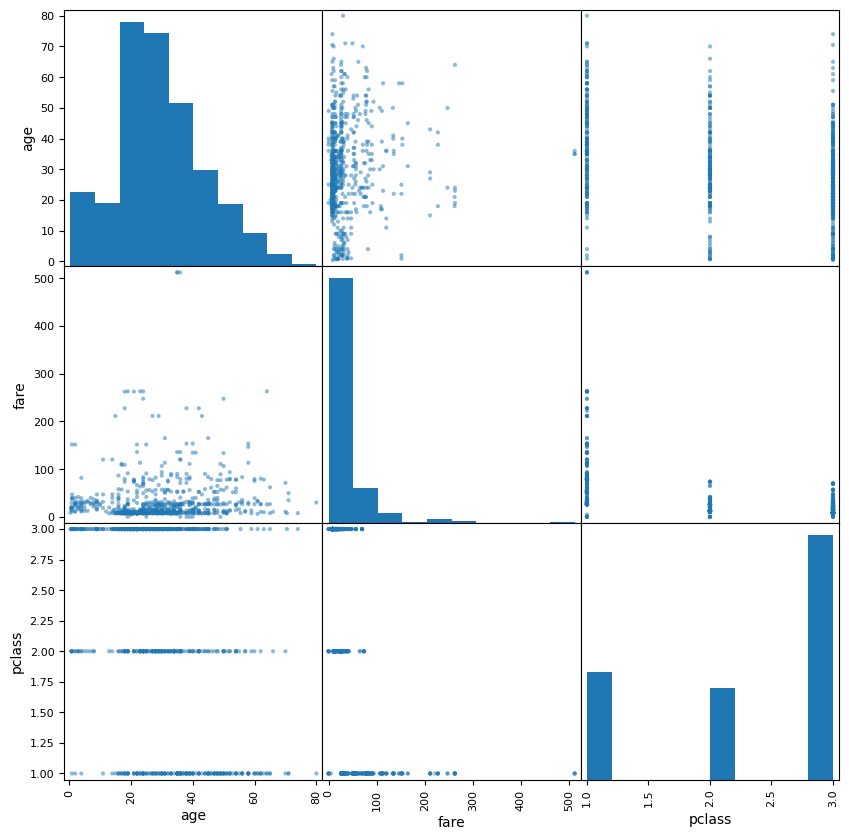

In [28]:
# We assign our attributes to the scatter_matrix and figure sizes.
attributes = ['age', 'fare', 'pclass']
scatter_matrix(df[attributes], figsize=(10, 10))


#### 2.1 Scatterplot

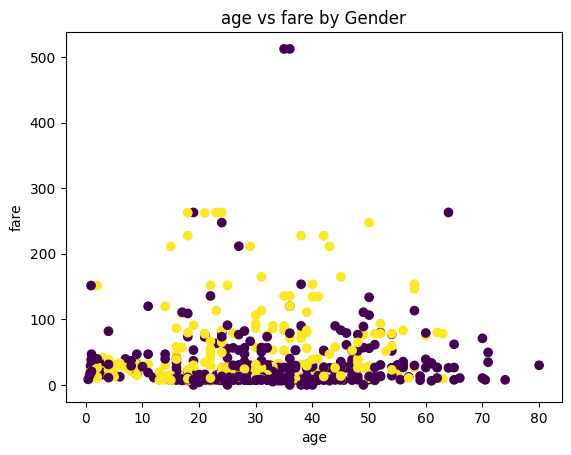

In [29]:
# We use our attributes to create scatterplots.
plt.scatter(df['age'], df['fare'], c=df['sex'].apply(lambda x: 0 if x == 'male' else 1))
plt.xlabel('age')
plt.ylabel('fare')
plt.title('age vs fare by Gender')
plt.show()

#### 2.1 Histogram

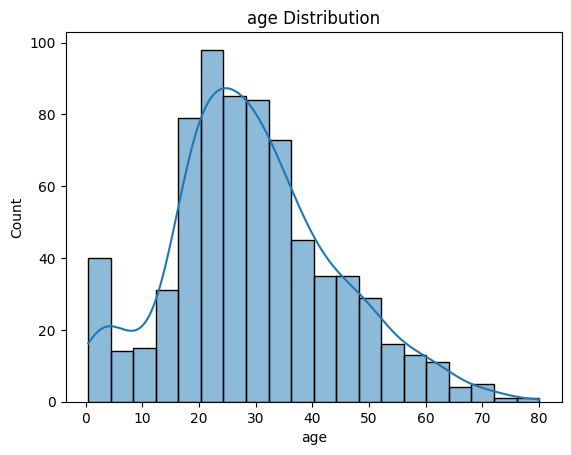

In [30]:
#We create a histogram of age.
sns.histplot(df['age'], kde=True)
plt.title('age Distribution')
plt.show()

#### 2.1 Count Plot

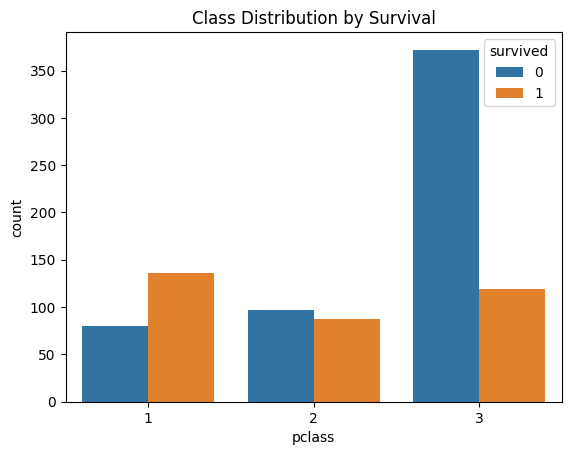

In [31]:
#We create a count plot for class and survival.
sns.countplot(x='pclass', hue='survived', data=df)
plt.title('Class Distribution by Survival')
plt.show()

### 2.2 Handle missing values and clean data
- Impute or drop missing values (as applicable).
- Remove or transform outliers (as applicable).
- Convert categorical data to numerical format using encoding (as applicable).

In [32]:
# age was missing values. 
# We can impute missing values for age using the median:
df.loc[:, 'age'] = df['age'].fillna(df['age'].median())
 
# embarked was missing values.
# We can drop missing values for embarked (or fill with mode):
df.loc[:, 'embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])

### 2.3 Feature selection and engineering
- Create new features (as applicable).
- Transform or combine existing features to improve model performance (as applicable).
- Scale or normalize data (as applicable).

#### 2.3: Convert categorical data to numeric:

In [34]:
# We convert categorical data to numeric.
df['sex'] = df['sex'].map({'male': 0, 'female': 1})
df['embarked'] = df['embarked'].map({'C': 0, 'Q': 1, 'S': 2})

#### 2.3: Create a binary feature for 'alone':

In [35]:
# We create a binary feature for 'Alone'.
# Create 'Alone' column: 1 if no siblings/spouse or parents/children aboard, else 0
df['Alone'] = ((df['sibsp'] + df['parch']) == 0).astype(int)

### Reflection of Section 2

1) What patterns or anomalies do you see?
   1) Ans: 'age' is a core data point in this set as it has high correlation to others selected. 
2) Do any features stand out? 
   1) Ans: 'age' & 'pclass' initially have a strong relationship.
3) What preprocessing steps were necessary to clean and improve the data? 
   1) Ans: We had to fill in the missing values for 'age' & 'embarked'.
4) Did you create or modify any features to improve performance?
   1) Ans: We converted categorical data to numeric and a binary feature for 'alone'.

## Section 3. Feature Selection and Justification
### 3.1 Choose features and target
- Select two or more input features (numerical for regression, numerical and/or categorical for classification)
- Select a target variable (as applicable)
    - Regression: Continuous target variable (e.g., price, temperature).
    - Classification: Categorical target variable (e.g., gender, species).
    - Clustering: No target variable.
- Justify your selection with reasoning.


### 3.2 Define X and y
1) Assign input features to X
2) Assign target variable to y (as applicable)

In [36]:
# Here we assign inputs to "x" and 
# target variables to "y".
X = df[['age', 'fare', 'pclass', 'sex']]
y = df['survived']

### Reflection of Section 3:

1) Why did you choose these features? 
   1) Ans: These appeared to high viable correlations for analysis and model training. 
2) How might they impact predictions or accuracy?
   1) Ans: Hoping that the feature engineering will help increase accuracy and that 'survived' is a good baseline. 

## Section 4. Train a Model 
### (Classification: Choose 1: Decision Tree, Random Forest, Logistic Regression)

- 4.1 Split the data into training and test sets using train_test_split (or StratifiedShuffleSplit if class imbalance is an issue).
- 4.2 Train model using Scikit-Learn model.fit() method.
- 4.3 Evalulate performance, for example:
    - Regression: R^2, MAE, RMSE (RMSE has been recently updated)
    - Classification: Accuracy, Precision, Recall, F1-score, Confusion Matrix
    - Clustering: Inertia, Silhouette Score 

#### 4.1 Split the data into training and test sets using train_test_split (or StratifiedShuffleSplit if class imbalance is an issue).

In [37]:
# We use Scaler to transform and normalize our data.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Here we split the data for training and testing
# 'X_train' and 'X_test'.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
print('Train size:', len(X_train))
print('Test size:', len(X_test))


Train size: 712
Test size: 179


#### 4.1 Stratified Train/Test split

In [38]:
# Here we assign indices to stratify our test & train data.
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)

for train_indices, test_indices in splitter.split(X, y):
    train_set = X.iloc[train_indices]
    test_set = X.iloc[test_indices]

print('Train size:', len(train_set))
print('Test size:', len(test_set))

Train size: 712
Test size: 179


#### 4.1 Compare Results

In [39]:
# Here we print our findings to compare results.
print("Original Class Distribution:\n", y.value_counts(normalize=True))
print("")
# Basic Train/Test:
print("Basic Train/Test Method")
print("Train Set Class Distribution:\n", X_train['pclass'].value_counts(normalize=True))
print("Test Set Class Distribution:\n", X_test['pclass'].value_counts(normalize=True))
print("")
# Stratified Train/Test
print("Stratified Train/Test Method")
print("Train Set Class Distribution:\n", train_set['pclass'].value_counts(normalize=True))
print("Test Set Class Distribution:\n", test_set['pclass'].value_counts(normalize=True))


Original Class Distribution:
 survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

Basic Train/Test Method
Train Set Class Distribution:
 pclass
3    0.557584
1    0.233146
2    0.209270
Name: proportion, dtype: float64
Test Set Class Distribution:
 pclass
3    0.525140
1    0.279330
2    0.195531
Name: proportion, dtype: float64

Stratified Train/Test Method
Train Set Class Distribution:
 pclass
3    0.561798
1    0.227528
2    0.210674
Name: proportion, dtype: float64
Test Set Class Distribution:
 pclass
3    0.508380
1    0.301676
2    0.189944
Name: proportion, dtype: float64


#### 4.2 Train model using Scikit-Learn model.fit() method.

Train size:  712 Test size:  179
Results for Decision Tree on training data:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       439
           1       1.00      0.96      0.98       273

    accuracy                           0.98       712
   macro avg       0.99      0.98      0.98       712
weighted avg       0.98      0.98      0.98       712

Results for Decision Tree on test data:
              precision    recall  f1-score   support

           0       0.79      0.76      0.77       110
           1       0.64      0.67      0.65        69

    accuracy                           0.73       179
   macro avg       0.71      0.72      0.71       179
weighted avg       0.73      0.73      0.73       179



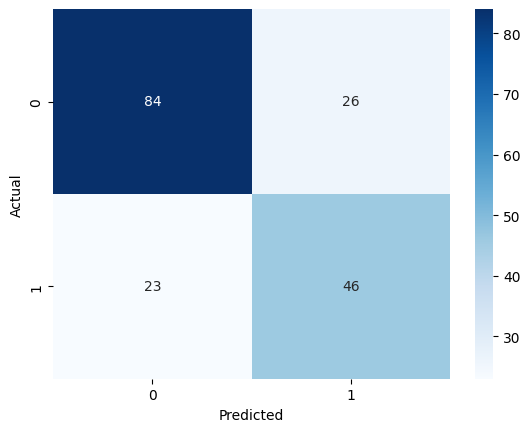

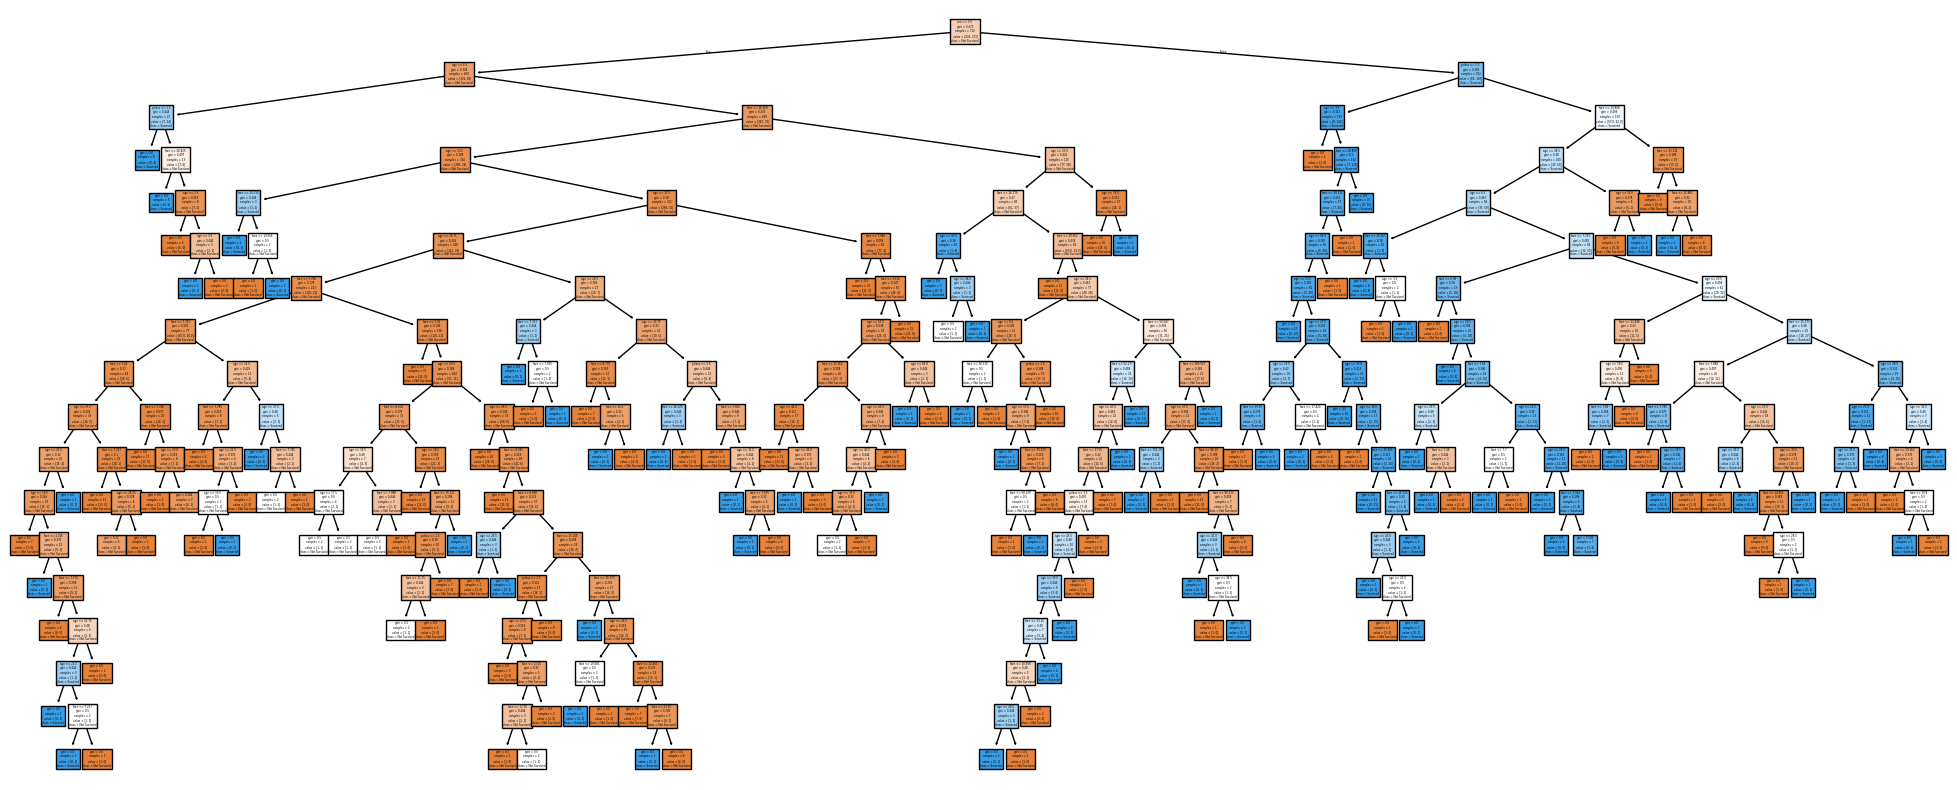

In [ ]:
# Split the data into training and testing sets
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)
for train_indices, test_indices in splitter.split(X, y):
    X_train = X.iloc[train_indices]
    X_test = X.iloc[test_indices]
    y_train = y.iloc[train_indices]
    y_test = y.iloc[test_indices]

print('Train size: ', len(X_train), 'Test size: ', len(X_test))

# Create and train a Decision Tree model
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

# Evaluate the model on training data
y_pred = tree_model.predict(X_train)
print("Results for Decision Tree on training data:")
print(classification_report(y_train, y_pred))

# Evaluate the model on test data
y_test_pred = tree_model.predict(X_test)
print("Results for Decision Tree on test data:")
print(classification_report(y_test, y_test_pred))

# Confusion matrix visualization
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot the decision tree
fig = plt.figure(figsize=(25,10))
plot_tree(tree_model, feature_names=X.columns, class_names=['Not Survived', 'Survived'], filled=True)
plt.show()
fig.savefig("decision_tree_titanic.png")

### Reflection of Section 4:

1) How well did the model perform? 
   1) Ans: 
2) Any surprises in the results?
   1) Ans: 


### Section 5. Improve the Model or Try Alternates (Implement a Second Option)
- 5.1 Train an alternative classifier (e.g., Decision Tree, Random Forest, Logistic Regression) OR adjust hyperparameters on the original model.
- 5.2 Compare performance of all models across the same performance metrics.

--- Decision Tree ---
[[84 26]
 [22 47]]
              precision    recall  f1-score   support

           0       0.79      0.76      0.78       110
           1       0.64      0.68      0.66        69

    accuracy                           0.73       179
   macro avg       0.72      0.72      0.72       179
weighted avg       0.74      0.73      0.73       179

--- SVM ---
[[96 14]
 [41 28]]
              precision    recall  f1-score   support

           0       0.70      0.87      0.78       110
           1       0.67      0.41      0.50        69

    accuracy                           0.69       179
   macro avg       0.68      0.64      0.64       179
weighted avg       0.69      0.69      0.67       179

--- MLP ---
[[93 17]
 [19 50]]
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       110
           1       0.75      0.72      0.74        69

    accuracy                           0.80       179
   macro avg       0.79  

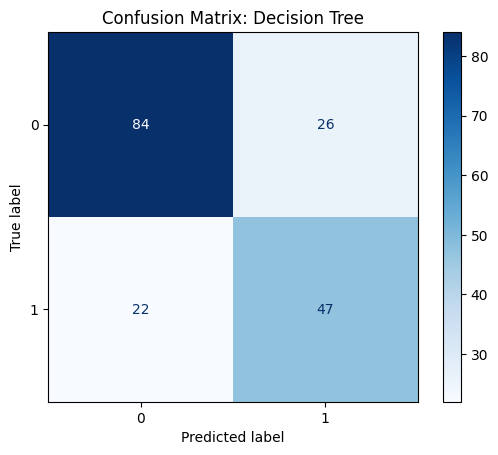

In [41]:
# We use this function to compare models. 
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'SVM': SVC(kernel='rbf', probability=True),
    'MLP': MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'KNN': KNeighborsClassifier()
}

# Here we retrieve and print the results.
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"--- {name} ---")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

# Finally we build a Confusion Matrix on the results.
ConfusionMatrixDisplay.from_estimator(models['Decision Tree'], X_test, y_test, cmap='Blues')
plt.title('Confusion Matrix: Decision Tree')
plt.show()

### 5.4 Compare All Models
Create a summary table or printout comparing all models:

Decision Tree: Mean accuracy = 0.78
SVM: Mean accuracy = 0.67
MLP: Mean accuracy = 0.78
Random Forest: Mean accuracy = 0.81
KNN: Mean accuracy = 0.70


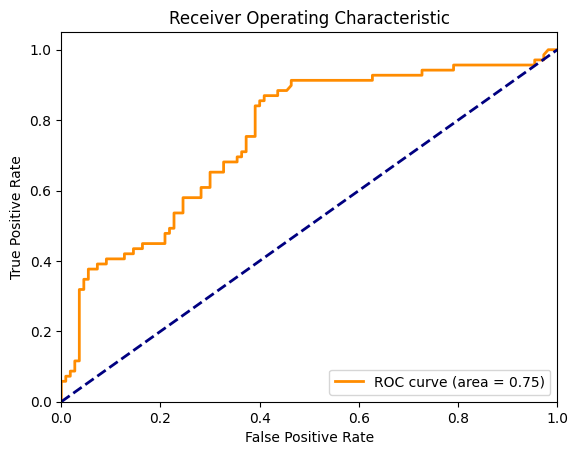

In [42]:

for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5)
    print(f"{name}: Mean accuracy = {scores.mean():.2f}")

# Example for ROC curve with SVM
y_pred_prob = models['SVM'].predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)


plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


### Reflection 5: 
1) Which model performed better? 
   1) Ans: 
2) Why might one classifier be more effective in this specific case?
   1) Ans: 

### Section 6. Final Thoughts & Insights
- 6.1 Summarize findings.
- 6.2 Discuss challenges faced.
- 6.3 If you had more time, what would you try next?